In [21]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
root = os.getcwd()
dataset = root + "/YelpData.csv"

In [23]:
root

'./fair_taucc/datasets/yelp'

In [24]:
import chardet
with open(dataset, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(encoding)

Windows-1252


In [25]:
df = pd.read_csv(dataset, encoding=encoding)

In [6]:
df.shape

(2399, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReviewID            2399 non-null   int64  
 1   ReviewerName        2399 non-null   object 
 2   FirstName           2399 non-null   object 
 3   Location            2399 non-null   object 
 4   CheckedIn           2399 non-null   int64  
 5   PicturePresent      2399 non-null   int64  
 6   Friends             2399 non-null   int64  
 7   Reviews             2399 non-null   int64  
 8   Bar_Restaurant      2399 non-null   object 
 9   Rating              2399 non-null   int64  
 10  CITY                2399 non-null   object 
 11  YelpElite           2399 non-null   int64  
 12  Useful              2399 non-null   int64  
 13  Month_5             2399 non-null   int64  
 14  Month_4             2399 non-null   int64  
 15  Month_3             2399 non-null   int64  
 16  Month_

In [19]:
print(df.head(10))

   ReviewID  ReviewerName  FirstName          Location  CheckedIn  \
0         1  Gwendolyn P.  Gwendolyn  Philadelphia, PA          0   
1         2       Anna H.       Anna   Little Rock, AR          0   
2         3    Melissa K.    Melissa         Miami, FL          0   
3         4      Maria B.      Maria         Miami, FL          1   
4         5       Adam S.       Adam         Miami, FL          0   
5         6   Michelle L.   Michelle         Miami, FL          0   
6         7       Todd O.       Todd         Miami, FL          0   
7         8       Jill J.       Jill       Orlando, FL          0   
8         9       Adam B.       Adam     Hollywood, FL          1   
9        10       Ryan T.       Ryan        Denver, CO          0   

   PicturePresent  Friends  Reviews                Bar_Restaurant  Rating  \
0               0       21      189              Buena Vista Deli       4   
1               0       12       34   Tropical Chinese Restaurant       4   
2        

In [29]:
restaurants = np.unique(df["Bar_Restaurant"].to_numpy(), return_counts=True)[0]
reviewerName = np.unique(df["ReviewerName"].to_numpy(), return_counts=True)[0]

In [73]:
num_restaurant = restaurants.shape[0]

In [71]:
num_reviewer = reviewerName.shape[0]

In [59]:
gender = []

for name in reviewerName:
    data = df[df["ReviewerName"] == name]
    sex = data["gender"].to_numpy()[0]
    gender.append(sex)

In [66]:
gender = np.array(gender)
gender = np.where(gender == 'female', 1, 0)

(1441,)

In [67]:
np.save(f"{root}/gender.npy", gender)

In [70]:
np.save(f"{root}/restaurants.npy", restaurants)

In [69]:
np.save(f"{root}/reviewerName.npy", reviewerName)

# Create matrix

In [108]:
matrix = np.zeros((num_reviewer, num_restaurant), dtype=int)

In [109]:
for index, row in df.iterrows():
    name = row["ReviewerName"]
    id_row = np.where(reviewerName == name)[0]
    restaurant = row["Bar_Restaurant"]
    id_col = np.where(restaurants == restaurant)[0]
    rating = row["Rating"]
    matrix[id_row, id_col] = rating


In [110]:
np.unique(matrix, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([477770,    157,    150,    206,    594,    976]))

In [111]:
# 2399 rows = ratings

In [112]:
np.unique(df["Rating"].to_numpy(), return_counts=True)

(array([1, 2, 3, 4, 5]), array([ 166,  188,  234,  710, 1101]))

In [113]:
np.save(f"{root}/matrix.npy", matrix)

## Rating Distribution by Gender

The box plot shows the distribution of ratings given by male and female reviewers, highlighting the median, quartiles, and potential outliers.

This helps to identify any differences in average ratings between genders.

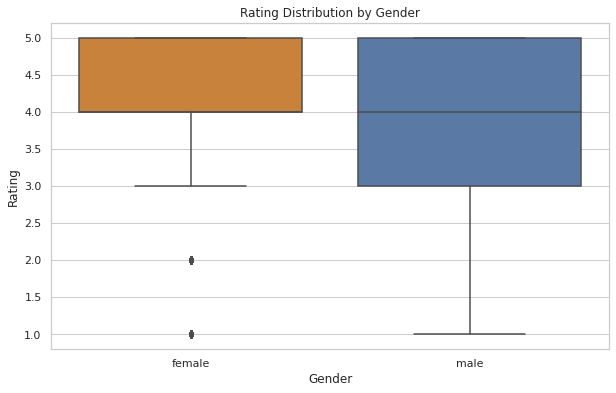

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a box plot for rating distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='Rating', data=df, palette={'male': '#4d77b1', 'female': '#e08225'})
plt.title('Rating Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
# plt.legend(['female', 'male'], loc='upper right')
plt.show()

## Average Rating by Gender

The bar chart display the average rating for male and female reviewers.

This helps to provide a clear comparison of how each gender rates businesses on average.

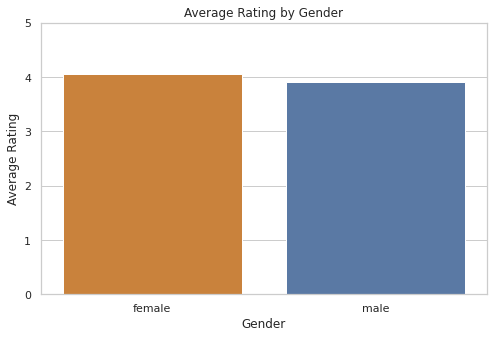

In [52]:
# Calculate average ratings by gender
average_ratings = df.groupby('gender')['Rating'].mean().reset_index()

# Create a bar plot for average ratings by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='Rating', data=average_ratings, palette={'male': '#4d77b1', 'female': '#e08225'})
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Ratings are on a scale from 1 to 5
# plt.legend(['female', 'male'], loc='upper right')
plt.show()

In [35]:
sx = np.load(f"{root}/gender.npy")
np.unique(sx, return_counts=True)

(array([0, 1]), array([545, 896]))

In [29]:
sx[:10]

array(['female', 'male', 'male', 'male', 'male', 'male', 'female',
       'female', 'female', 'female'], dtype='<U6')

In [30]:
sensitive = np.where(sx == 'female', 1, 0)
sensitive[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [34]:
np.save(f"{root}/gender.npy", sensitive)

In [33]:
sx.shape

(1441,)

In [39]:
root

'./fair_taucc/datasets/yelp'

In [41]:
restaurants = np.load(f"{root}/restaurants.npy", allow_pickle=True)
restaurants

array(['100 Montaditos', '180° @ The DRB', '3 Chefs And A Chicken',
       'A-Mari-Mix Fresh Mex Fusion', 'AD Barnes Park',
       'Ali’s Sweet Treats', 'Andiamo', 'Angelina’s Coffee & Juice',
       'Antigua Guatemala Restaurante', 'Aoki Teppanyaki',
       'Arbetter’s Hot Dogs', 'Asia Grocery', 'Asian Thai Kitchen',
       'Asian Thai Kitchen 2', 'Atelier Monnier', 'Azul Restaurant',
       'Bajareque Cafeteria Restaurant', 'Bali Café', 'Ball & Chain',
       'Bangkok City Thai & Seafood Restaurant', 'BarMeli',
       'Batch Gastropub', 'Beaudevin', 'Beehive Juice Bar',
       'Benny’s Seafood Restaurant', 'Berries in the Grove',
       'Best Sub & Sandwich Shop', 'Bianco Gelato', 'Bin No. 18',
       'Blackbird Ordinary', 'Blanche Park', 'Blue Collar',
       'Bocaito Spanish Cuisine', 'Bocce', 'Bonding',
       'BrewskiS South Miami', 'Brick House', 'Brickell Key Park',
       'Bryan In The Kitchen', 'Buena Vista Bistro', 'Buena Vista Deli',
       'Bunbury', 'Bunnie Cakes', 'Buns 

In [43]:
df_rest = pd.DataFrame(data={"restaurant": restaurants})
df_rest.to_csv(f"{root}/restaurants.csv", index=False)

## True labels

Type (restaurant, bar, coffee...) and cousine (american, cuban, spanish...) of restaurants from Google Maps

In [5]:
labels = pd.read_csv(root + "/restaurants.csv", sep=";")
labels

,restaurant,type,cousine
0,100 Montaditos,restaurant,spanish
1,180° @ The DRB,pub,-
2,3 Chefs And A Chicken,restaurant,takeout
3,A-Mari-Mix Fresh Mex Fusion,restaurant,mexican
4,AD Barnes Park,park,-
...,...,...,...
328,YUZU Frozen Yogurt and Crêpes,yogurt,-
329,Yambo Restaurant,restaurant,nicaraguan
330,Zuma,restaurant,japanese
331,eCafé,coffee,-


In [6]:
labels['combined'] = labels.apply(lambda row: f"{row['cousine']}_{row['type']}" if row['cousine'] != '-' else row['type'], axis=1)

In [7]:
labels

,restaurant,type,cousine,combined
0,100 Montaditos,restaurant,spanish,spanish_restaurant
1,180° @ The DRB,pub,-,pub
2,3 Chefs And A Chicken,restaurant,takeout,takeout_restaurant
3,A-Mari-Mix Fresh Mex Fusion,restaurant,mexican,mexican_restaurant
4,AD Barnes Park,park,-,park
...,...,...,...,...
328,YUZU Frozen Yogurt and Crêpes,yogurt,-,yogurt
329,Yambo Restaurant,restaurant,nicaraguan,nicaraguan_restaurant
330,Zuma,restaurant,japanese,japanese_restaurant
331,eCafé,coffee,-,coffee


In [8]:
np.unique(labels["combined"].to_numpy(), return_counts=True)

(array(['american_restaurant', 'argentinian_restaurant', 'art_museum',
        'asian_restaurant', 'asturian_restaurant', 'bagel', 'bakery',
        'bar', 'bistro', 'brasserie', 'brazilian_restaurant',
        'brunch_restaurant', 'cake', 'chicken_restaurant',
        'chinese_restaurant', 'coffee', 'colombian_restaurant',
        'cuban_restaurant', 'event_venue', 'farmers_market',
        'fine_dining_restaurant', 'french_restaurant', 'gourmet_grocery',
        'greek_restaurant', 'grocery', 'guatemalan_restaurant',
        'hamburger', 'health_food_restaurant', 'honduran_restaurant',
        'hot_dog_restaurant', 'ice_cream', 'indian_market',
        'indonesian_restaurant', 'italian_restaurant',
        'jamaican_restaurant', 'japanese_restaurant', 'juice',
        'korean_restaurant', 'latin_american_restaurant',
        'lebanese_restaurant', 'live_music_bar', 'market',
        'mediterranean_restaurant', 'mexican_restaurant',
        'middle_eastern_restaurant', 'nicaraguan_res

In [14]:
types = np.unique(labels["type"].to_numpy())
types.shape

(22,)

In [19]:
restaurant_type = labels["type"].to_numpy()
np.save(f"{root}/restaurant_type_str.npy", restaurant_type)

restaurant_cousine = labels["combined"].to_numpy()
np.save(f"{root}/restaurant_type_cousine_str.npy", restaurant_cousine)

In [15]:
restaurant_type.shape

(333,)

In [20]:
indices = np.searchsorted(types, restaurant_type)
np.save(f"{root}/restaurant_type.npy", indices)
print(indices)

[17 16 17 17 15  1 17  6 17 17 17  8 17 17  1 17 17 17  2 17 17 17  2 17
 17 17 19 10  2  2 15 17 17 17 17  2 14 15 17 17 17 17  5 17  9 17 17 17
  7 17 17  2 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 16 17 17 17 12
  1 17  1 17 17 17 17 17 17 17 17 17 17 17 17  4 17 17  1 17 17 17 17 17
 17 12 17 17 17 17 17 17 17 17 17  6 10 16 17  9 17 17 17 17 17 17  9 17
 18 17 17  2 17 17 17 17  2 17 20 17 19 17 17 17 17 17 17 17 17 17 17 17
  1 17  1 17 17  2 17 17 17 17  2 17 17 17 17 17 19  1  2 17 17 17 17 17
  2 17 17 17 17  9 17 17 17 17 17 17 17 17 17 17 17 15 15 17 17 17 17 19
 17 19  1 17 17 17 17 17 17 17 17 17 17 17 12 17 17 17 17 17 20 17  6 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17  9 11 17 17 17 17 19  6 17 17
 17 17 17 17 17 16 17  6 17 17 17 17 20 17 17 17 17 17 20 12 17  2 17  6
 20 17 17 17 19 20 17 17 17 17 17  6 17 17 17 17 17 17 17 17  2 11 20 20
 15 17 17  6 17  3 17  2 17 17  8 17 17 17 17  6  0 17 17 17  2 17 15 17
 17 17 17 17 17 17 17  2  2 13 17 20  2 17 17 17 21

In [17]:
types

array(['bagel', 'bakery', 'bar', 'bistro', 'brasserie', 'cake', 'coffee',
       'event_venue', 'grocery', 'hamburger', 'ice_cream', 'juice',
       'market', 'museum', 'night_club', 'park', 'pub', 'restaurant',
       'salad', 'sandwich', 'steak_house', 'yogurt'], dtype=object)

In [18]:
restaurant_type

array(['restaurant', 'pub', 'restaurant', 'restaurant', 'park', 'bakery',
       'restaurant', 'coffee', 'restaurant', 'restaurant', 'restaurant',
       'grocery', 'restaurant', 'restaurant', 'bakery', 'restaurant',
       'restaurant', 'restaurant', 'bar', 'restaurant', 'restaurant',
       'restaurant', 'bar', 'restaurant', 'restaurant', 'restaurant',
       'sandwich', 'ice_cream', 'bar', 'bar', 'park', 'restaurant',
       'restaurant', 'restaurant', 'restaurant', 'bar', 'night_club',
       'park', 'restaurant', 'restaurant', 'restaurant', 'restaurant',
       'cake', 'restaurant', 'hamburger', 'restaurant', 'restaurant',
       'restaurant', 'event_venue', 'restaurant', 'restaurant', 'bar',
       'restaurant', 'restaurant', 'restaurant', 'restaurant',
       'restaurant', 'restaurant', 'restaurant', 'restaurant',
       'restaurant', 'restaurant', 'restaurant', 'restaurant',
       'restaurant', 'restaurant', 'restaurant', 'pub', 'restaurant',
       'restaurant', 'restaurant',